In [1]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
# Import BaseMetric, or have it available to inherit from
from lsst.sims.maf.metrics import BaseMetric

In [3]:
# Define our class, inheriting from BaseMetric
class MaxOverMaxMetric(BaseMetric):
    """
    Calculate the ratio of the maximum of one 
    value and the maximum of another
    """ 
    def __init__(self, colNumer, colDenom, **kwargs):
        # Set the values we want to keep for our class.
        
        self.colNumer = colNumer
        self.colDenom = colDenom
        cols = [colNumer,colDenom]
        super(MaxOverMaxMetric, self).__init__(col=cols, **kwargs)
        
    # Now write out "run" method, the part that does 
    # the metric calculation.
    def run(self, dataSlice, slicePoint=None):
        numerator = np.max(dataSlice[self.colNumer])
        denominator = np.max(dataSlice[self.colDenom])
        result = numerator/denominator
        return result

In [4]:
outDir ='simple_tutorial'
dbFile = 'baseline2018a.db'
opsimdb = db.OpsimDatabase(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)

In [5]:
metric = MaxOverMaxMetric(colNumer='fiveSigmaDepth',colDenom='airmass')
slicer = slicers.OneDSlicer(sliceColName='night',binsize=1)
sql = 'night <= 7 and filter = "z"'
bundle = metricBundles.MetricBundle(metric, slicer, sql)
print(bundle.dbCols)

{'night', 'fiveSigmaDepth', 'airmass'}


In [6]:
bg = metricBundles.MetricBundleGroup({0: bundle}, opsimdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database SummaryAllProps with constraint night <= 7 and filter = "z" for columns ['night', 'fiveSigmaDepth', 'airmass']
Found 3483 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "night <= 7 and filter = "z"" constraint now.
Plotting complete.


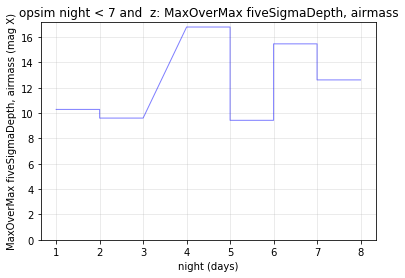

In [7]:
bg.plotAll(closefigs=False)